# Metropolis Hastings Algorithm

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
def density1(z):
    z = np.reshape(z, [z.shape[0], 2])
    z1, z2 = z[:, 0], z[:, 1]
    norm = np.sqrt(z1 ** 2 + z2 ** 2)
    exp1 = np.exp(-0.5 * ((z1 - 2) / 0.6) ** 2)
    exp2 = np.exp(-0.5 * ((z1 + 2) / 0.6) ** 2)
    u = 0.5 * ((norm - 2) / 0.4) ** 2 - np.log(exp1 + exp2)
    return np.exp(-u)

def density2(z):
    z = np.reshape(z, [z.shape[0], 2])
    x_1, x_2 = z[:, 0], z[:, 1]
    
    #parameters
    sigma_1 = 0.5
    sigma_2 = 0.5
    mu_1 = 1
    mu_2 = 1
    
    norm = 1 / (2 * np.pi * sigma_1 * sigma_2)
    exp1 = (np.sqrt(x_1 ** 2 + x_2 ** 2)- mu_1) ** 2 / (2 * sigma_1 ** 2)
    exp2 = (x_2 - mu_2) ** 2 / (2 * sigma_2 ** 2)
    u = exp1 + exp2                                                                  
    return norm*np.exp(-u)

def density3(z):
    z = np.reshape(z, [z.shape[0], 2])
    x_1, x_2 = z[:, 0], z[:, 1]
    
    #parameters
    sigma_1 = 1/10
    sigma_2 = np.sqrt(10)

    
    u = (1 / (2 * np.pi * sigma_1 * sigma_2))*np.exp(-(x_2 - x_1**2) ** 2 /(2*sigma_1**2) -
                                                          (x_1 - 1) ** 2 / (2* sigma_2 ** 2))
    return u

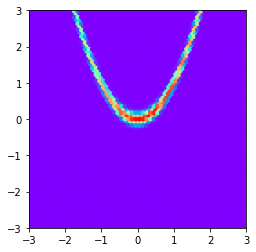

In [5]:
r = np.linspace(-5, 5, 1000)
z = np.array(np.meshgrid(r, r)).transpose(1, 2, 0)
z = np.reshape(z, [z.shape[0] * z.shape[1], -1])

q0 = density3(z)
plt.hexbin(z[:,0], z[:,1], C=q0.squeeze(), cmap='rainbow')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

In [37]:
def metropolis_hastings(density_function, sampling_size=1000):
    burnin_size = 100
    sampling_size += burnin_size
    x0 = np.array([[0, 0]])
    xt = x0
    samples = []
    count = 0
    while count < sampling_size:
        xt_candidate = np.array([np.random.multivariate_normal(xt[0], np.eye(2))])
        accept_prob = (density_function(xt_candidate)[-1]) / (density_function(xt)[-1])
        if np.random.uniform(0, 1) < accept_prob:
            xt = xt_candidate
        samples.append([xt[:,0],xt[:,1]])
        count = len(np.unique(np.array(samples),axis=0))
    samples = np.unique(np.array(samples),axis=0)
    samples = samples[burnin_size:]
    
    return samples

In [33]:
def metropolis_hastings_(density_function, sampling_size=10000):
    burnin_size = 10000
    sampling_size += burnin_size
    x0 = np.array([[0, 0]])
    xt = x0
    samples = []
    for i in range(sampling_size):
        xt_candidate = np.array([np.random.multivariate_normal(xt[0], np.eye(2))])
        accept_prob = (density_function(xt_candidate)[-1]) / (density_function(xt)[-1])
        if np.random.uniform(0, 1) < accept_prob:
            xt = xt_candidate
        samples.append(xt)
    samples = np.array(samples[burnin_size:])
    samples = np.reshape(samples,[samples.shape[0],samples.shape[-1]])
    return samples

In [38]:
samples = metropolis_hastings(density2)

In [35]:
samples.shape

(10000, 2)

In [36]:
len(np.unique(samples,axis=0))

3257

In [58]:
a = []
a.append([0,1])
a.append([0,2])
np.array(a).shape

(2, 2)

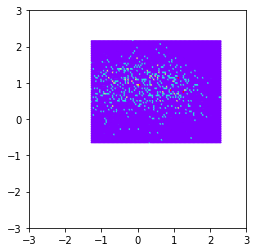

In [59]:
plt.hexbin(samples[:,0], samples[:,1], cmap='rainbow')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

In [59]:
gaussian = np.random.multivariate_normal([0,0], np.eye(2), size = 10000)

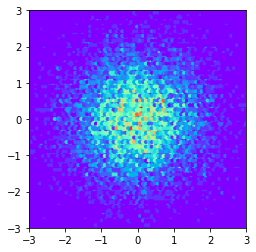

In [60]:
plt.hexbin(gaussian[:,0], gaussian[:,1], cmap='rainbow')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

In [43]:
samples.shape

(10000, 2)